In [3]:
!pip install geopandas


In [39]:
# Import 3rd party libraries
import os
import json
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Configure Notebook
%matplotlib inline 
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

# Load Zillow Data

In [42]:
# Load each CSV file
zillow_one = pd.read_csv('zillow-one.csv')
zillow_two = pd.read_csv('zillow-two.csv')
zillow_three = pd.read_csv('zillow-three.csv')
zillow_four = pd.read_csv('zillow-four.csv')
zillow_studio = pd.read_csv('zillow-studio.csv')

# Display the first few rows of each file

print("Zillow One:")
print(zillow_one.head())
print("\nZillow Two:")
print(zillow_two.head())
print("\nZillow Three:")
print(zillow_three.head())
print("\nZillow Four:")
print(zillow_four.head())
print("\nZillow Studio:")
print(zillow_studio.head())

Zillow One:
                                        Property URL Property type  \
0  https://www.zillow.com/homedetails/413-Markham...     Apartment   
1  https://www.zillow.com/homedetails/1221-King-S...     Apartment   
2  https://www.zillow.com/homedetails/47-Lower-Ri...     Apartment   
3  https://www.zillow.com/b/1350-ellesmere-rd-tor...      Building   
4  https://www.zillow.com/b/1350-ellesmere-rd-tor...     Apartment   

   Number of days on Zillow Date listed (MM/DD/YYYY)  \
0                       2.0               11/04/2024   
1                       2.0               11/04/2024   
2                       2.0               11/04/2024   
3                       3.0               11/03/2024   
4                       NaN                      NaN   

   Rental price (USD per month)  Living area Living area unit  \
0                        2400.0        900.0             sqft   
1                        2200.0        500.0             sqft   
2                        2200.0    

In [44]:
# Display the column names of each file
print("Columns in Zillow One:")
print(zillow_one.columns.tolist())
print("\nColumns in Zillow Two:")
print(zillow_two.columns.tolist())
print("\nColumns in Zillow Three:")
print(zillow_three.columns.tolist())
print("\nColumns in Zillow Four:")
print(zillow_four.columns.tolist())
print("\nColumns in Zillow Studio:")
print(zillow_studio.columns.tolist())

Columns in Zillow One:
['Property URL', 'Property type', 'Number of days on Zillow', 'Date listed (MM/DD/YYYY)', 'Rental price (USD per month)', 'Living area', 'Living area unit', 'Price per living area unit (USD)', 'Bedrooms', 'Bathrooms', 'Image URL', 'Is owner occupied', 'Property owned by Zillow', 'Property unit number', 'Street address', 'City', 'Zip', 'Latitude', 'Longitude', 'Zillow property ID', 'Property is a building', 'Building name', 'Unit availability count']

Columns in Zillow Two:
['Property URL', 'Property type', 'Number of days on Zillow', 'Date listed (MM/DD/YYYY)', 'Rental price (USD per month)', 'Living area', 'Living area unit', 'Price per living area unit (USD)', 'Bedrooms', 'Bathrooms', 'Image URL', 'Is owner occupied', 'Property owned by Zillow', 'Property unit number', 'Street address', 'City', 'Zip', 'Latitude', 'Longitude', 'Zillow property ID', 'Property is a building', 'Building name', 'Unit availability count']

Columns in Zillow Three:
['Property URL', 'P

In [46]:
# Combine into one dataframe
combined_df = pd.concat([zillow_one, zillow_two, zillow_three, zillow_four, zillow_studio], ignore_index=True)

# Display the combined DataFrame info to verify
print("Combined DataFrame:")
print(combined_df.info())
print(combined_df.head())

Combined DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3780 entries, 0 to 3779
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Property URL                      3780 non-null   object 
 1   Property type                     3780 non-null   object 
 2   Number of days on Zillow          2210 non-null   float64
 3   Date listed (MM/DD/YYYY)          2210 non-null   object 
 4   Rental price (USD per month)      2645 non-null   float64
 5   Living area                       385 non-null    float64
 6   Living area unit                  385 non-null    object 
 7   Price per living area unit (USD)  385 non-null    float64
 8   Bedrooms                          2632 non-null   float64
 9   Bathrooms                         1510 non-null   float64
 10  Image URL                         2611 non-null   object 
 11  Is owner occupied                 1510 non-null  

In [48]:
# Filter the DataFrame to keep only rows with non-null values in the "Living area" column and "latitude" column
filtered_df = combined_df[combined_df['Living area'].notnull()]
filtered_df = filtered_df.dropna(subset=['Latitude'])

# Display the filtered DataFrame info to verify
print("Filtered DataFrame:")
print(filtered_df.info())


Filtered DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 377 entries, 0 to 3779
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Property URL                      377 non-null    object 
 1   Property type                     377 non-null    object 
 2   Number of days on Zillow          267 non-null    float64
 3   Date listed (MM/DD/YYYY)          267 non-null    object 
 4   Rental price (USD per month)      377 non-null    float64
 5   Living area                       377 non-null    float64
 6   Living area unit                  377 non-null    object 
 7   Price per living area unit (USD)  377 non-null    float64
 8   Bedrooms                          377 non-null    float64
 9   Bathrooms                         377 non-null    float64
 10  Image URL                         375 non-null    object 
 11  Is owner occupied                 377 non-null    objec

In [50]:


# Select only the specified columns
filtered_df = filtered_df[['Property URL', 'Rental price (USD per month)', 'Living area', 
                           'Bedrooms', 'Bathrooms', 'Street address', 'Latitude', 'Longitude']]

# Display the filtered DataFrame info to verify
print("Filtered DataFrame with selected columns:")
print(filtered_df.info())

Filtered DataFrame with selected columns:
<class 'pandas.core.frame.DataFrame'>
Index: 377 entries, 0 to 3779
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Property URL                  377 non-null    object 
 1   Rental price (USD per month)  377 non-null    float64
 2   Living area                   377 non-null    float64
 3   Bedrooms                      377 non-null    float64
 4   Bathrooms                     377 non-null    float64
 5   Street address                377 non-null    object 
 6   Latitude                      377 non-null    float64
 7   Longitude                     377 non-null    float64
dtypes: float64(6), object(2)
memory usage: 26.5+ KB
None


# Neighbourhoods

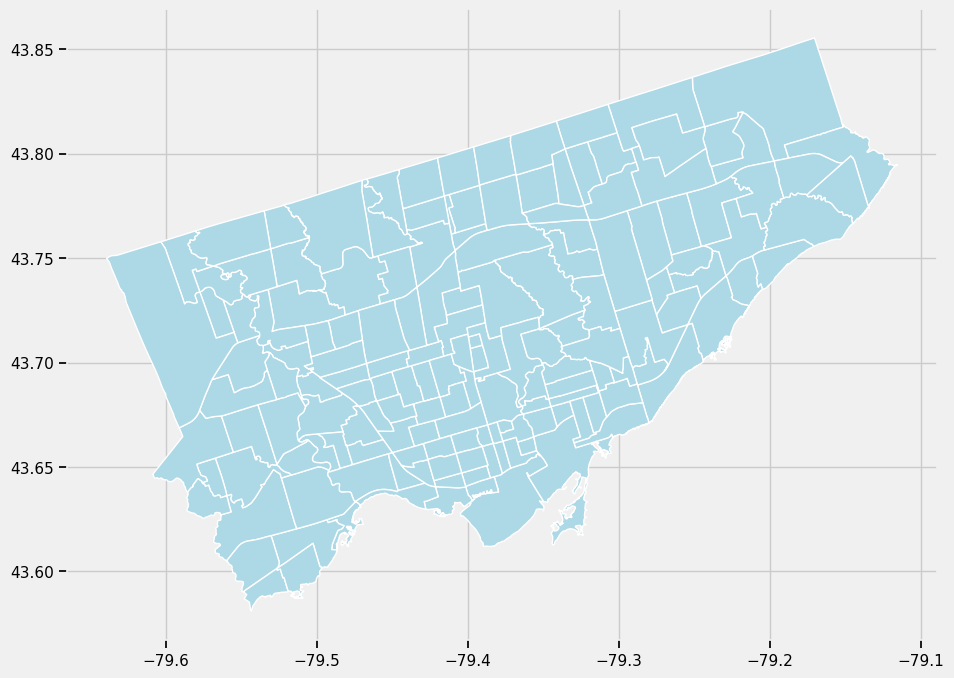

In [53]:
# Load the shapefile (use the path to the .shp file)
neighbourhoods = gpd.read_file('Neighbourhoods - 4326.shp')

# Plot the neighborhoods
fig, ax = plt.subplots(figsize=(10, 10))
neighbourhoods.plot(ax=ax, color='lightblue', edgecolor='white')
plt.show()

In [55]:
# Display the first few rows of the neighbourhoods GeoDataFrame
print(neighbourhoods.head())

   _id1  AREA_ID2  AREA_AT3  PARENT_4 AREA_SH5 AREA_LO6  \
0     1   2502366  26022881         0      174      174   
1     2   2502365  26022880         0      173      173   
2     3   2502364  26022879         0      172      172   
3     4   2502363  26022878         0      171      171   
4     5   2502362  26022877         0      170      170   

                    AREA_NA7                         AREA_DE8  \
0  South Eglinton-Davisville  South Eglinton-Davisville (174)   
1              North Toronto              North Toronto (173)   
2         Dovercourt Village         Dovercourt Village (172)   
3   Junction-Wallace Emerson   Junction-Wallace Emerson (171)   
4         Yonge-Bay Corridor         Yonge-Bay Corridor (170)   

                               CLASSIF9 CLASSIF10   OBJECTI11  \
0  Not an NIA or Emerging Neighbourhood        NA  17824737.0   
1  Not an NIA or Emerging Neighbourhood        NA  17824753.0   
2  Not an NIA or Emerging Neighbourhood        NA  17824769

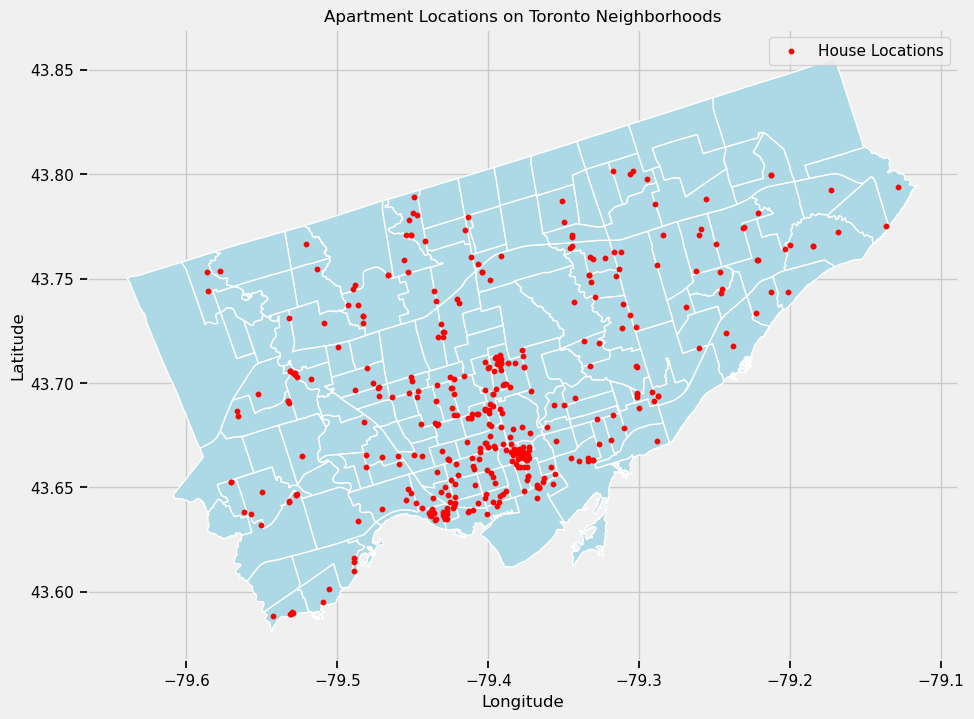

In [57]:
# Plot neighborhoods
fig, ax = plt.subplots(figsize=(10, 10))
neighbourhoods.plot(ax=ax, color='lightblue', edgecolor='white')

# Plot house locations
plt.scatter(filtered_df['Longitude'], filtered_df['Latitude'], color='red', s=10, label="House Locations")

# Add labels and legend
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.title("Apartment Locations on Toronto Neighborhoods")

plt.show()

In [62]:
# Perform a spatial join to add the neighborhood name (from AREA_NA7) to each apartment
geometry = [Point(xy) for xy in zip(filtered_df['Longitude'], filtered_df['Latitude'])]
filtered_gdf = gpd.GeoDataFrame(filtered_df, geometry=geometry, crs='EPSG:4326')
joined_df = gpd.sjoin(filtered_gdf, neighbourhoods, how="left", predicate="within")

# Assign the neighborhood name from AREA_NA7 to a new column in the filtered DataFrame
filtered_gdf['Neighbourhood'] = joined_df['AREA_NA7']

# Display the updated DataFrame with neighborhood names
print(filtered_gdf.head())

                                         Property URL  \
0   https://www.zillow.com/homedetails/413-Markham...   
1   https://www.zillow.com/homedetails/1221-King-S...   
2   https://www.zillow.com/homedetails/47-Lower-Ri...   
12  https://www.zillow.com/homedetails/120-Rowntre...   
13  https://www.zillow.com/homedetails/1100-Sheppa...   

    Rental price (USD per month)  Living area  Bedrooms  Bathrooms  \
0                         2400.0        900.0       1.0        1.0   
1                         2200.0        500.0       1.0        1.0   
2                         2200.0        500.0       1.0        1.0   
12                        1645.0        800.0       1.0        1.0   
13                        2400.0        626.0       1.0        1.0   

          Street address   Latitude  Longitude                    geometry  \
0         413 Markham St  43.660350 -79.410310  POINT (-79.41031 43.66035)   
1         1221 King St W  43.638584 -79.427666  POINT (-79.42767 43.63858)   
2 

# Add Hoodrank

In [65]:
# Define the neighborhood ranking as a dictionary
neighbourhood_ranking = {
    'Danforth': 1,
    'West Queen West': 2,
    'Runnymede-Bloor West Village': 3,
    'Avondale': 4,
    'Wellington Place': 5,
    'Yonge-Doris': 6,
    'Cabbagetown-South St.James Town': 7,
    'Bay-Cloverhill': 8,
    'Palmerston-Little Italy': 9,
    'Trinity-Bellwoods': 10,
    'Bridle Path-Sunnybrook-York Mills': 11,
    'Annex': 12,
    'North Riverdale': 13,
    'Mount Pleasant East': 14,
    'Lawrence Park North': 15,
    'Kingsway South': 16,
    'University': 17,
    'Yonge-Bay Corridor': 18,
    'Leaside-Bennington': 19,
    'South Eglinton-Davisville': 20,
    'Harbourfront-CityPlace': 21,
    'Wychwood': 22,
    'Dovercourt Village': 23,
    'Blake-Jones': 24,
    'Roncesvalles': 25,
    'Dufferin Grove': 26,
    'Lawrence Park South': 27,
    'Church-Wellesley': 28,
    'Casa Loma': 29,
    'Woodbine-Lumsden': 30,
    'Danforth East York': 31,
    'Regent Park': 32,
    'Lansing-Westgate': 33,
    'Downtown Yonge East': 34,
    'St Lawrence-East Bayfront-The Islands': 35,
    'Yonge-Eglinton': 36,
    'High Park-Swansea': 37,
    'Little Portugal': 38,
    'Forest Hill South': 39,
    'Playter Estates-Danforth': 40,
    'Junction Area': 41,
    'Woodbine Corridor': 42,
    'The Beaches': 43,
    'Rosedale-Moore Park': 44,
    'Old East York': 45,
    'Bedford Park-Nortown': 46,
    'High Park North': 47,
    'Kensington-Chinatown': 48,
    'Yonge-St.Clair': 49,
    'Junction-Wallace Emerson': 50,
    'Princess-Rosethorn': 51,
    'Fort York-Liberty Village': 52,
    'North St.James Town': 53,
    'Willowdale West': 54,
    'North Toronto': 55,
    'Greenwood-Coxwell': 56,
    'Bayview Village': 57,
    'South Riverdale': 58,
    'Humewood-Cedarvale': 59,
    'East End-Danforth': 60,
    'Taylor-Massey': 61,
    'East Willowdale': 62,
    'Corso Italia-Davenport': 63,
    'Etobicoke City Centre': 64,
    'Stonegate-Queensway': 65,
    'Centennial Scarborough': 66,
    'Hillcrest Village': 67,
    'Humber Bay Shores': 68,
    'Moss Park': 69,
    'Broadview North': 70,
    'Morningside Heights': 71,
    'Lambton Baby Point': 72,
    'Newtonbrook East': 73,
    'Malvern West': 74,
    'Forest Hill North': 75,
    'Clanton Park': 76,
    'Pleasant View': 77,
    'Banbury-Don Mills': 78,
    'Malvern East': 79,
    'Islington': 80,
    'Markland Wood': 81,
    'Highland Creek': 82,
    'Agincourt North': 83,
    'Edenbridge-Humber Valley': 84,
    'East L\'Amoreaux': 85,
    'Alderwood': 86,
    'Milliken': 87,
    'Henry Farm': 88,
    'Steeles': 89,
    'St.Andrew-Windfields': 90,
    'Pelmo Park-Humberlea': 91,
    'Guildwood': 92,
    'Oakwood Village': 93,
    'Agincourt South-Malvern West': 94,
    'Birchcliffe-Cliffside': 95,
    'Clairlea-Birchmount': 96,
    'Englemount-Lawrence': 97,
    'West Rouge': 98,
    'Tam O\'Shanter-Sullivan': 99,
    'Briar Hill-Belgravia': 100,
    'Bayview Woods-Steeles': 101,
    'Weston-Pelham Park': 102,
    'Bathurst Manor': 103,
    'Woburn North': 104,
    'Bendale South': 105,
    'Newtonbrook West': 106,
    'L\'Amoreaux West': 107,
    'Eringate-Centennial-West Deane': 108,
    'Flemingdon Park': 109,
    'Westminster-Branson': 110,
    'Don Valley Village': 111,
    'Long Branch': 112,
    'Caledonia-Fairbank': 113,
    'Humber Heights-Westmount': 114,
    'Parkwoods-O\'Connor Hills': 115,
    'Rockcliffe-Smythe': 116,
    'Thistletown-Beaumond Heights': 117,
    'Keelesdale-Eglinton West': 118,
    'Maple Leaf': 119,
    'O\'Connor-Parkview': 120,
    'Etobicoke West Mall': 121,
    'Morningside': 122,
    'Mimico-Queensway': 123,
    'Bendale-Glen Andrew': 124,
    'Oakridge': 125,
    'Dorset Park': 126,
    'Thorncliffe Park': 127,
    'Wexford/Maryvale': 128,
    'Victoria Village': 129,
    'Elms-Old Rexdale': 130,
    'Cliffcrest': 131,
    'Humbermede': 132,
    'Mount Dennis': 133,
    'Ionview': 134,
    'Willowridge-Martingrove-Richview': 135,
    'Downsview': 136,
    'Kingsview Village-The Westway': 137,
    'Eglinton East': 138,
    'Fenside-Parkwoods': 139,
    'Yorkdale-Glen Park': 140,
    'Mount Olive-Silverstone-Jamestown': 141,
    'West Humber-Clairville': 142,
    'Glenfield-Jane Heights': 143,
    'South Parkdale': 144,
    'York University Heights': 145,
    'New Toronto': 146,
    'Golfdale-Cedarbrae-Woburn': 147,
    'Brookhaven-Amesbury': 148,
    'Rexdale-Kipling': 149,
    'Rustic': 150,
    'Humber Summit': 151,
    'Scarborough Village': 152,
    'Beechborough-Greenbrook': 153,
    'Oakdale-Beverley Heights': 154,
    'Weston': 155,
    'West Hill': 156,
    'Black Creek': 157,
    'Kennedy Park': 158
}

# Map the ranks to the 'Neighbourhood' column in filtered_gdf
filtered_gdf['Neighbourhood Rank'] = filtered_gdf['Neighbourhood'].map(neighbourhood_ranking)


In [67]:
print(filtered_gdf.head())

                                         Property URL  \
0   https://www.zillow.com/homedetails/413-Markham...   
1   https://www.zillow.com/homedetails/1221-King-S...   
2   https://www.zillow.com/homedetails/47-Lower-Ri...   
12  https://www.zillow.com/homedetails/120-Rowntre...   
13  https://www.zillow.com/homedetails/1100-Sheppa...   

    Rental price (USD per month)  Living area  Bedrooms  Bathrooms  \
0                         2400.0        900.0       1.0        1.0   
1                         2200.0        500.0       1.0        1.0   
2                         2200.0        500.0       1.0        1.0   
12                        1645.0        800.0       1.0        1.0   
13                        2400.0        626.0       1.0        1.0   

          Street address   Latitude  Longitude                    geometry  \
0         413 Markham St  43.660350 -79.410310  POINT (-79.41031 43.66035)   
1         1221 King St W  43.638584 -79.427666  POINT (-79.42767 43.63858)   
2 

# We now have a dataframe with living area, bedroom, bathroom, neighbourhood rank, and rent. 

# The following line of code will create a file to your working directory, you do not need to run it if you already downloaded the file from github

In [174]:
# Export the DataFrame to a CSV file
filtered_gdf.to_csv('filtered_data_with_neighbourhood_rank.csv', index=False)

print("Data exported successfully to 'filtered_data_with_neighbourhood_rank.csv'")

Data exported successfully to 'filtered_data_with_neighbourhood_rank.csv'


# What does our data look like

In [73]:
# import data
df = pd.read_csv('filtered_data_with_neighbourhood_rank.csv')
print(df.head())

                                        Property URL  \
0  https://www.zillow.com/homedetails/413-Markham...   
1  https://www.zillow.com/homedetails/1221-King-S...   
2  https://www.zillow.com/homedetails/47-Lower-Ri...   
3  https://www.zillow.com/homedetails/120-Rowntre...   
4  https://www.zillow.com/homedetails/1100-Sheppa...   

   Rental price (USD per month)  Living area  Bedrooms  Bathrooms  \
0                        2400.0        900.0       1.0        1.0   
1                        2200.0        500.0       1.0        1.0   
2                        2200.0        500.0       1.0        1.0   
3                        1645.0        800.0       1.0        1.0   
4                        2400.0        626.0       1.0        1.0   

         Street address   Latitude  Longitude                      geometry  \
0        413 Markham St  43.660350 -79.410310    POINT (-79.41031 43.66035)   
1        1221 King St W  43.638584 -79.427666  POINT (-79.427666 43.638584)   
2     47 Lo

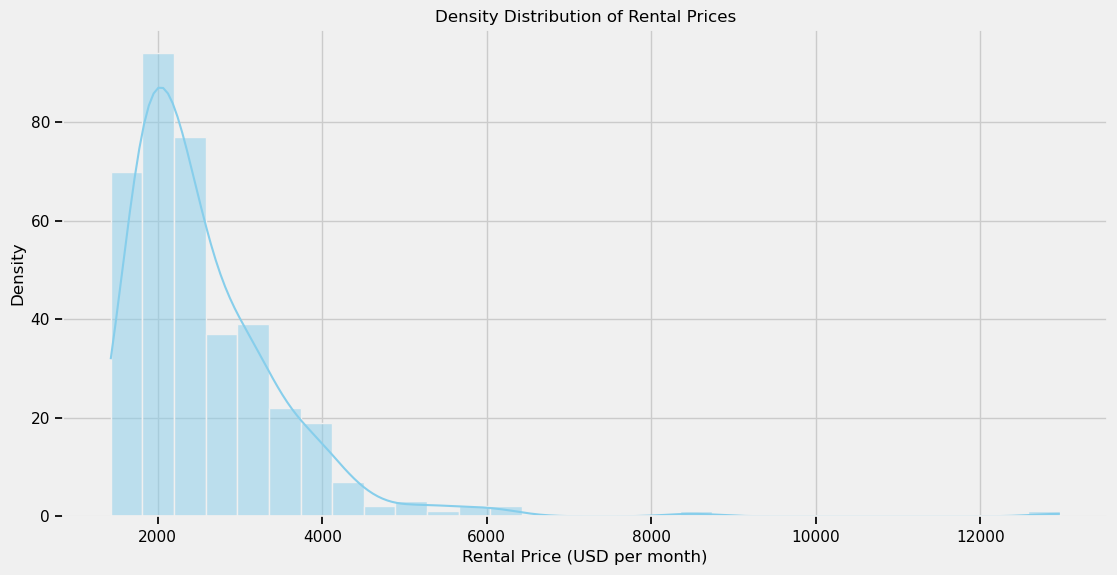

In [77]:
# Plot the density distribution of rental prices
plt.figure(figsize=(12, 6))
sns.histplot(df['Rental price (USD per month)'], kde=True, color="skyblue", bins=30)
plt.xlabel('Rental Price (USD per month)')
plt.ylabel('Density')
plt.title('Density Distribution of Rental Prices')
plt.show()

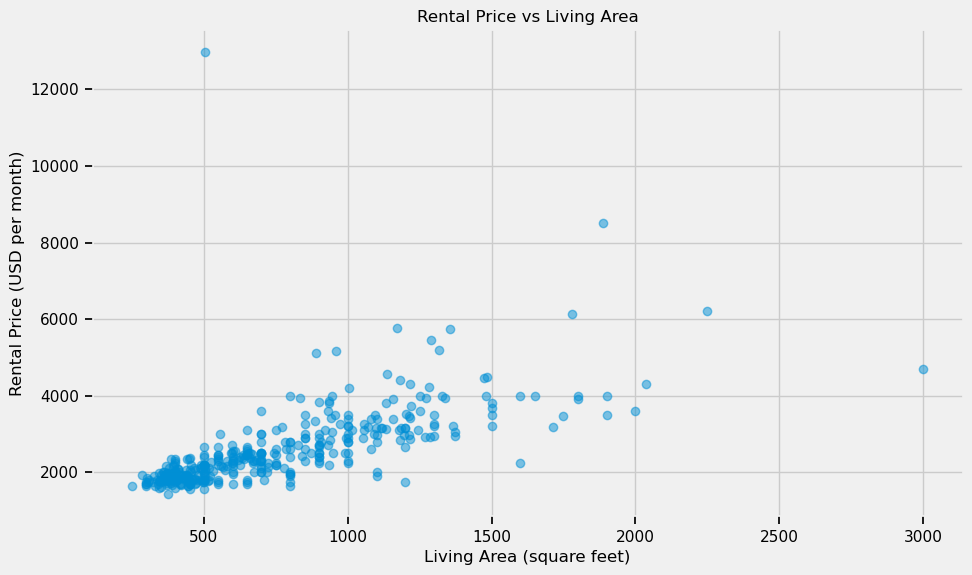

In [79]:

# Plot Rental price vs Living area
plt.figure(figsize=(10, 6))
plt.scatter(df['Living area'], df['Rental price (USD per month)'], alpha=0.5)
plt.xlabel('Living Area (square feet)')
plt.ylabel('Rental Price (USD per month)')
plt.title('Rental Price vs Living Area')
plt.show()

# check and remove outliers

In [82]:

# Filter for outliers: price above 5000 or area above 2000
outliers = df[(df['Rental price (USD per month)'] > 5000) | (df['Living area'] > 2000)]

# Display the outliers
print("Outliers (Price > 5000 USD or Area > 2000 sq ft):")
print(outliers)

Outliers (Price > 5000 USD or Area > 2000 sq ft):
                                          Property URL  \
156  https://www.zillow.com/homedetails/600-Brookda...   
157  https://www.zillow.com/homedetails/207-Davisvi...   
159  https://www.zillow.com/b/minto-yorkville-toron...   
175  https://www.zillow.com/b/the-ivy-toronto-on-BM...   
178  https://www.zillow.com/homedetails/270-Davenpo...   
180  https://www.zillow.com/b/waverley-toronto-on-B...   
188  https://www.zillow.com/homedetails/455-Welling...   
194  https://www.zillow.com/b/the-thomas-toronto-on...   
200  https://www.zillow.com/b/immix-toronto-on-CcSzy6/   
203  https://www.zillow.com/b/the-stack-toronto-on-...   
224  https://www.zillow.com/b/novus-toronto-on-Cbvstn/   
237  https://www.zillow.com/homedetails/39-Lower-Li...   

     Rental price (USD per month)  Living area  Bedrooms  Bathrooms  \
156                        5200.0       1316.0       3.0        2.0   
157                        4300.0       2038.0       

I checked the listings and The $12968 per month listing is supposed to be a pent houses and the area of 500 square feet is erroneous. This data point will be removed

In [87]:
# Filter out listings with price higher than 12000
df = df[df['Rental price (USD per month)'] <= 12000]

# Verify the filtering by checking the maximum price
print("Maximum rental price after filtering:", df['Rental price (USD per month)'].max())

Maximum rental price after filtering: 8500.0


# split data into train, val, test

In [131]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

The train, val, and test are divide somewhat evenly geographically since I divided the data into clusters beased on where they are and the train and test sets needs to have a proportional amount of data from each cluster.

In [108]:
# Reset the index of the DataFrame to ensure sequential indices
df = df.reset_index(drop=True)

# Define the number of clusters (e.g., 10 clusters)
num_clusters = 10

# Perform clustering on latitude and longitude
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['LocationCluster'] = kmeans.fit_predict(df[['Latitude', 'Longitude']])

# Initialize StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Perform the stratified split for train and temp (which we'll split into validation and test later)
for train_index, temp_index in splitter.split(df, df['LocationCluster']):
    train = df.loc[train_index].reset_index(drop=True)
    temp = df.loc[temp_index].reset_index(drop=True)

# Split temp further into validation and test sets
stratified_splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
for val_index, test_index in stratified_splitter.split(temp, temp['LocationCluster']):
    val = temp.loc[val_index].reset_index(drop=True)
    test = temp.loc[test_index].reset_index(drop=True)

# Verify the distribution
print("Train set cluster distribution:\n", train['LocationCluster'].value_counts())
print("\nValidation set cluster distribution:\n", val['LocationCluster'].value_counts())
print("\nTest set cluster distribution:\n", test['LocationCluster'].value_counts())

Train set cluster distribution:
 LocationCluster
0    61
7    52
9    49
3    35
5    20
8    19
2    18
1    18
6    18
4    10
Name: count, dtype: int64

Validation set cluster distribution:
 LocationCluster
0    8
9    6
7    6
3    4
8    3
5    3
1    3
6    2
2    2
4    1
Name: count, dtype: int64

Test set cluster distribution:
 LocationCluster
7    7
0    7
9    6
3    5
2    3
8    2
5    2
6    2
4    2
1    2
Name: count, dtype: int64


# Training Set

<Axes: >

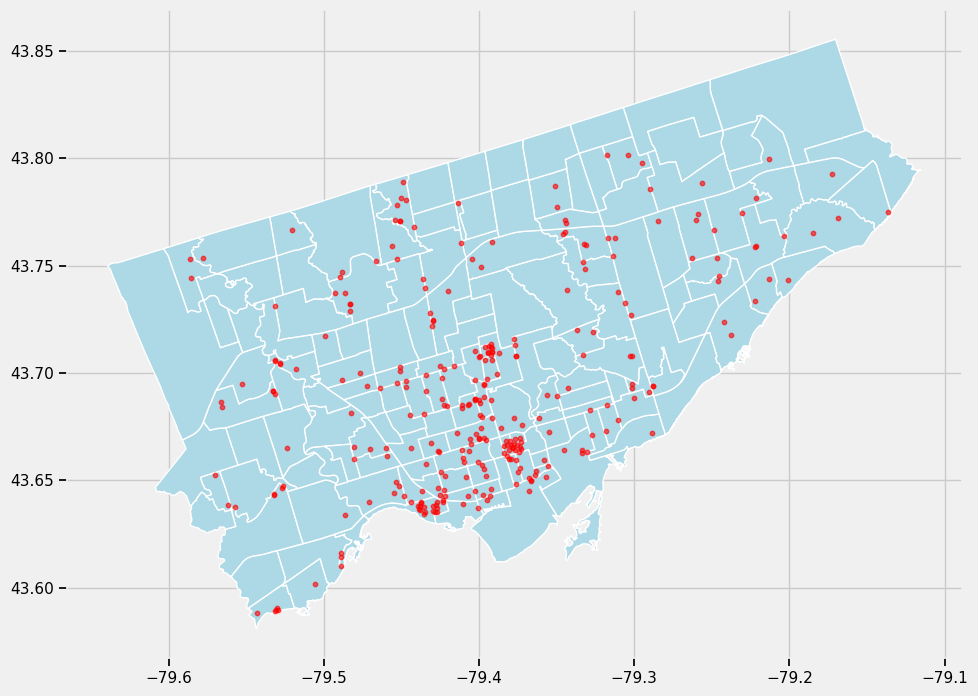

In [110]:
geometry = [Point(xy) for xy in zip(train['Longitude'], train['Latitude'])]
train_gdf = gpd.GeoDataFrame(train, geometry=geometry, crs='EPSG:4326')

# Plot the map with neighborhood boundaries
fig, ax = plt.subplots(figsize=(12, 8))
neighbourhoods.plot(ax=ax, color='lightblue', edgecolor='white')

# Overlay the apartment locations from the training set
train_gdf.plot(ax=ax, color='red', markersize=10, label="Train Set Locations", alpha=0.6)

# validation set

<Axes: >

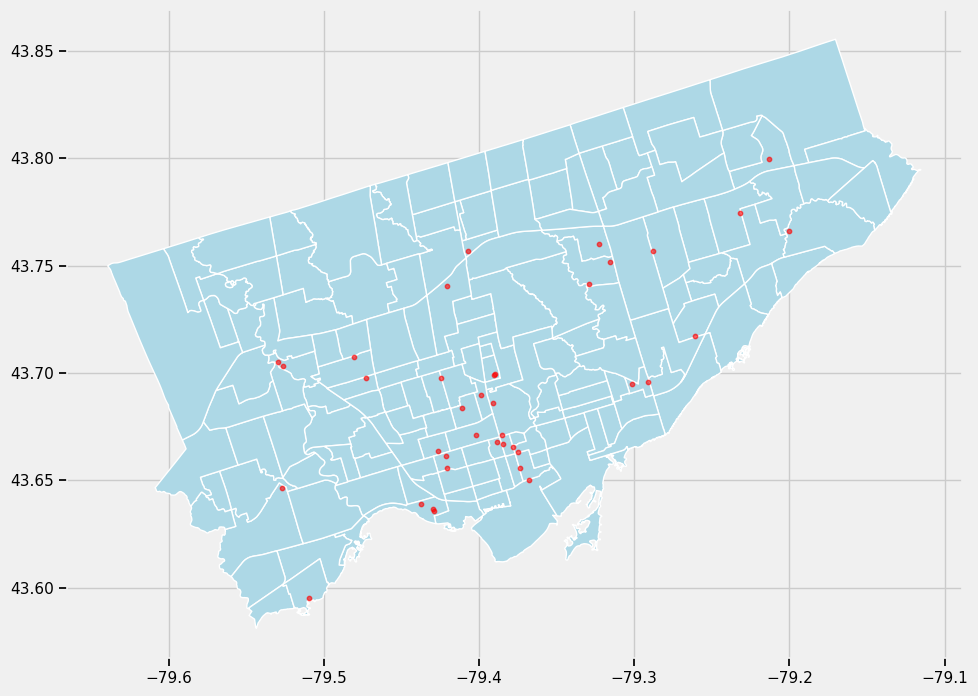

In [114]:
geometry = [Point(xy) for xy in zip(val['Longitude'], val['Latitude'])]
val_gdf = gpd.GeoDataFrame(val, geometry=geometry, crs='EPSG:4326')

# Plot the map with neighborhood boundaries
fig, ax = plt.subplots(figsize=(12, 8))
neighbourhoods.plot(ax=ax, color='lightblue', edgecolor='white')

# Overlay the apartment locations from the training set
val_gdf.plot(ax=ax, color='red', markersize=10, label="Train Set Locations", alpha=0.6)

# Features

In [149]:
def create_features(df, all_bedrooms=None, all_bathrooms=None):
    # Step 1: Dummy encode the number of bedrooms and bathrooms
    bedrooms_dummies = pd.get_dummies(df['Bedrooms'], prefix='Bedroom')
    bathrooms_dummies = pd.get_dummies(df['Bathrooms'], prefix='Bathroom')
    
    # Ensure consistent columns for dummy variables ( this is because the number of data points we have is not enough,  
    # so the validation set is missing 4 bedroom apartments since there aren't many 4 bedroom apartments to begin with.)
    if all_bedrooms is not None:
        bedrooms_dummies = bedrooms_dummies.reindex(columns=all_bedrooms, fill_value=0)
    if all_bathrooms is not None:
        bathrooms_dummies = bathrooms_dummies.reindex(columns=all_bathrooms, fill_value=0)
    
    # Step 2: Apply PCA to Latitude and Longitude to create PC1
    pca = PCA(n_components=1)
    df[['Latitude', 'Longitude']] = df[['Latitude', 'Longitude']].fillna(df[['Latitude', 'Longitude']].mean())  # Handle NaNs
    df['PC1'] = pca.fit_transform(df[['Latitude', 'Longitude']])
    
    # Step 3: Select required columns
    feature_df = pd.concat([
        bedrooms_dummies,
        bathrooms_dummies,
        df[['Neighbourhood Rank', 'Living area', 'PC1']]
    ], axis=1)
    
    # Step 4: Scale the features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(feature_df)
    scaled_feature_df = pd.DataFrame(scaled_features, columns=feature_df.columns)
    
    return scaled_feature_df


# The features dataframe has the dummy encoded categorical data(number of bed and bath), neighbourhood rank, living area, and PC1(which is made from lat and lon like in assignment 8). All the data is scaled.

In [147]:

features = create_features(train)
print(features.head())

   Bedroom_0.0  Bedroom_1.0  Bedroom_2.0  Bedroom_3.0  Bedroom_4.0  \
0    -0.793999     1.812654    -0.403473     -0.53624    -0.130189   
1    -0.793999    -0.551677     2.478479     -0.53624    -0.130189   
2    -0.793999     1.812654    -0.403473     -0.53624    -0.130189   
3    -0.793999     1.812654    -0.403473     -0.53624    -0.130189   
4     1.259447    -0.551677    -0.403473     -0.53624    -0.130189   

   Bathroom_1.0  Bathroom_2.0  Bathroom_3.0  Bathroom_4.0  Neighbourhood Rank  \
0      0.463222     -0.420084     -0.154566     -0.057831           -0.142352   
1     -2.158791      2.380476     -0.154566     -0.057831            1.504179   
2      0.463222     -0.420084     -0.154566     -0.057831           -1.351198   
3      0.463222     -0.420084     -0.154566     -0.057831           -0.705090   
4      0.463222     -0.420084     -0.154566     -0.057831           -0.225721   

   Living area       PC1  
0    -0.361693 -1.308657  
1     0.679200  2.214146  
2    -0.101

# Make a simple linear regression model with rmse

In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Model that predicts the mean rent all the time

In [163]:
# Calculate the mean rent from the training set
mean_rent = y_train.mean()

# Create baseline predictions for the validation set (all predictions are the mean rent)
y_baseline_pred = np.full_like(y_val, fill_value=mean_rent)

# Calculate the RMSE for this baseline model
baseline_rmse = np.sqrt(mean_squared_error(y_val, y_baseline_pred))
print("Baseline RMSE (mean prediction):", baseline_rmse)


Baseline RMSE (mean prediction): 896.7729733731468


In [153]:
# Step to define all possible columns for consistent dummy encoding
all_bedrooms = pd.get_dummies(train['Bedrooms'], prefix='Bedroom').columns
all_bathrooms = pd.get_dummies(train['Bathrooms'], prefix='Bathroom').columns

# Prepare features for train and val sets
X_train = create_features(train, all_bedrooms=all_bedrooms, all_bathrooms=all_bathrooms)
y_train = train['Rental price (USD per month)']

X_val = create_features(val, all_bedrooms=all_bedrooms, all_bathrooms=all_bathrooms)
y_val = val['Rental price (USD per month)']

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_val)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print("Validation RMSE:", rmse)

Validation RMSE: 1.019241427789975e+16


this didn't seem to work beacuse I didn't scale the y-values

# Run the linear regression model, making sure to scale the axis this time

In [155]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler for the target variable (rental price)
target_scaler = StandardScaler()
y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_val_scaled = target_scaler.transform(y_val.values.reshape(-1, 1)).flatten()

In [157]:
# Scale the features in create_features function for both train and validation sets
def create_features(df, scaler=None, all_bedrooms=None, all_bathrooms=None):
    bedrooms_dummies = pd.get_dummies(df['Bedrooms'], prefix='Bedroom')
    bathrooms_dummies = pd.get_dummies(df['Bathrooms'], prefix='Bathroom')

    if all_bedrooms is not None:
        bedrooms_dummies = bedrooms_dummies.reindex(columns=all_bedrooms, fill_value=0)
    if all_bathrooms is not None:
        bathrooms_dummies = bathrooms_dummies.reindex(columns=all_bathrooms, fill_value=0)
    
    pca = PCA(n_components=1)
    df[['Latitude', 'Longitude']] = df[['Latitude', 'Longitude']].fillna(df[['Latitude', 'Longitude']].mean())
    df['PC1'] = pca.fit_transform(df[['Latitude', 'Longitude']])
    
    feature_df = pd.concat([
        bedrooms_dummies,
        bathrooms_dummies,
        df[['Neighbourhood Rank', 'Living area', 'PC1']]
    ], axis=1)

    if scaler:
        scaled_features = scaler.transform(feature_df)
    else:
        scaler = StandardScaler()
        scaled_features = scaler.fit_transform(feature_df)

    scaled_feature_df = pd.DataFrame(scaled_features, columns=feature_df.columns)
    
    return scaled_feature_df, scaler

# Prepare features for train and val sets with consistent scaling
X_train, scaler = create_features(train, all_bedrooms=all_bedrooms, all_bathrooms=all_bathrooms)
X_val, _ = create_features(val, scaler=scaler, all_bedrooms=all_bedrooms, all_bathrooms=all_bathrooms)

In [159]:
model = LinearRegression()
model.fit(X_train, y_train_scaled)

# Predict on the validation set
y_pred_scaled = model.predict(X_val)

# Inverse transform the scaled predictions and calculate RMSE
y_pred = target_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print("Validation RMSE:", rmse)

Validation RMSE: 417.21976799077623
